# sqrt(x)

In [4]:
import numpy as np

def Sqrt(x):
    if x > 0.0:
        a = 0.0
        b = x
        while (np.abs(a - b) > 1e-15):
            a = (a + b) / 2.0
            b = x / a
        return b       
    elif np.abs(x) < 1e-15:
        return np.abs(x)
    else:
        return False
        
if __name__ == "__main__":
    for x in [0.1, 1e-20, 10]:
        print 'sqrt({0}):{1}'.format(x, Sqrt(x))
    print 'sqrt(-1):', Sqrt(-1)

sqrt(0.1):0.316227766017
sqrt(1e-20):1e-20
sqrt(10):3.16227766017
sqrt(-1): False


# Flood Fill

In [274]:
def Flood_Fill_Area(image,IMG_W, IMG_H, visited):
    for point in visited:
        start_x = point % IMG_W
        start_y = point / IMG_W
        next_points = next_point(image,start_x,start_y,IMG_W, IMG_H)
        next_points_copy = next_points[:]    
        for point in next_points:
            if point in visited:
                next_points_copy.remove(point)
        if next_points_copy != []:
            for point in next_points_copy:
                visited.append(point)
                return Flood_Fill_Area(image,IMG_W, IMG_H, visited)
    return visited

In [275]:
def next_point(image,start_x,start_y,IMG_W, IMG_H):
    """
    Find the point next to the start point with same color
    """
    loc = start_x + start_y * IMG_W
    loc_color = image[loc] 
    temp = []
    if ((start_x < IMG_W-1) & (image[loc+1] == loc_color)):
        temp.append(loc+1) # move right
    if ((start_y < IMG_H-1) & (image[loc+IMG_W] == loc_color)):
        temp.append(loc+IMG_W) # move down
    if ((start_x > 0) & (image[loc-1] == loc_color)):
        temp.append(loc-1) # move left
    if ((start_y > 0) & (image[loc-IMG_H] == loc_color)):
        temp.append(loc-IMG_H) # move up
    return temp

In [276]:
def Flood_Fill(img_array,start_x,start_y,IMG_W,IMG_H,target_color):
    loc = start_x + start_y * IMG_W
    visited = [loc]
    visited = Flood_Fill_Area(img_array,IMG_W, IMG_H, visited)
    img_array_1 = img_array[:]
    for x in visited:
        img_array_1[x] = target_color
    f = []
    for i in range(0,len(img_array_1),IMG_W):
        f.append(img_array_1[i:i+127])
    return f

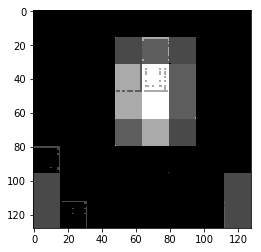

In [277]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
img = Image.open('Gray.bmp').convert("L")
plt.imshow(img,cmap='gray')
imgrr = np.asarray(img)

In [278]:
# numpy array
# IMG_W = 200
# IMG_H = 200

IMG_W = len(imgrr[0])
IMG_H = len(imgrr)
img_array = []
for x in imgrr:
    img_array.extend(x)

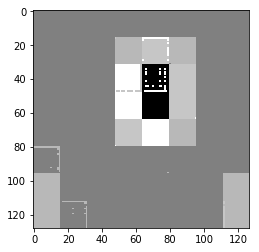

In [279]:
start_x = 70
start_y = 50
target_color = 0
plt.imshow(Flood_Fill(img_array,start_x,start_y,IMG_W,IMG_H,target_color),cmap='gray')

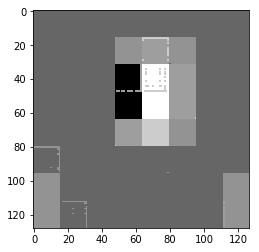

In [280]:
start_x = 50
start_y = 50
target_color = 0
plt.imshow(Flood_Fill(img_array,start_x,start_y,IMG_W,IMG_H,target_color),cmap='gray')

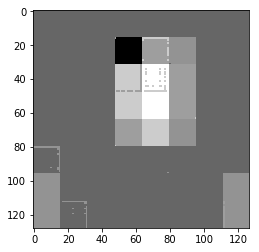

In [281]:
start_x = 50
start_y = 30
target_color = 0
plt.imshow(Flood_Fill(img_array,start_x,start_y,IMG_W,IMG_H,target_color),cmap='gray')